# Jupyter Notebook: Temperaturverlauf

## Daten Laden
Als erstes laden wir die Datei (jährliche Durchschnittstemperaturen) aus der Datei 'regional_averages_tm_year.txt'. In der ersten Zeile steht der Titel der Datei. Erst in der zweiten Zeile steht der Kopf, also die Spaltenbezeichnungen. Wir geben beide Zeilen aus.

<div class="alert alert-info">

**Wichtig:** Die zu lesende Datei muss sich in demselben Verzeichnis befinden wie das Jupyter Notebook!

Falls dies nicht der Fall ist muss die Datei in dasselbe Verzeichnis kopiert oder ein absoluter Pfad angegeben werden. Ein absoluter Pfad wäre zum Beispiel: 'C:/Downloads/regional_averages_tm_year.txt' anstatt 'regional_averages_tm_year.txt'.

</div>

In [1]:
import csv
with open('regional_averages_tm_year.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=';')
    title = next(readCSV, None)  # Titel auslesen
    print(title)
    kopf = next(readCSV, None)  # Kopfzeile auslesen
    print(kopf)

['Zeitreihen fuer Gebietsmittel fuer Bundeslaender und Kombinationen von Bundeslaender, erstellt am: 20210202']
['Jahr', 'Jahr', 'Brandenburg/Berlin', 'Brandenburg', 'Baden-Wuerttemberg', 'Bayern', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen', 'Niedersachsen/Hamburg/Bremen', 'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Schleswig-Holstein', 'Saarland', 'Sachsen', 'Sachsen-Anhalt', 'Thueringen/Sachsen-Anhalt', 'Thueringen', 'Deutschland', '']


Wir interessieren uns hauptsächlich für die ersten Jahreszahl (warum gibt es eigentlich zwei Spalten, die 'Jahr' heißen?!) und die Temperaturwerte in den ersten fünf Spalten ('Brandenburg/Berlin', 'Brandenburg', 'Baden-Wuerttemberg', 'Bayern' und 'Hessen'). Wir geben zunächst die ersten drei Zeilen mit Werten aus.

In [2]:
with open('regional_averages_tm_year.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=';')
    titel = next(readCSV, None)
    kopf = next(readCSV, None) # Kopfzeile
    zeile_1 = next(readCSV, None) # erste Zeile mit Werten
    zeile_2 = next(readCSV, None) # zweite Zeile mit Werten
    zeile_3 = next(readCSV, None) # dritte Zeile mit Werten
    
    # Ausgabe jeweils der ersten sieben Einträge 
    print(kopf[0:7])
    print(zeile_1[0:7])
    print(zeile_2[0:7])
    print(zeile_3[0:7])

['Jahr', 'Jahr', 'Brandenburg/Berlin', 'Brandenburg', 'Baden-Wuerttemberg', 'Bayern', 'Hessen']
['1881', 'year', '     7.55', '     7.54', '     7.66', '     6.61', '     7.49']
['1882', 'year', '     8.99', '     8.97', '     8.08', '     7.33', '     8.25']
['1883', 'year', '     8.42', '     8.41', '     7.77', '     6.85', '     7.96']


Aha, die erste Spalte enthält die eigentlichen Jahreszahlen. In der zweiten Spalte steht anscheinend ein konstanter String, der keine für uns interessante Information enthält. Typischerweise beginnt die Aufgabe eines Data Scientist, damit Daten zu verstehen und zu bereinigen. Wir benötigen also tatsächlich die Spalten mit den folgenden Indizes:  
* index 0 für die Jahreszahlen
* index 2-6 für die interessanten Temperatur-Werte: Berlin, Brandenburg, BW, Bayern und Hessen

Wir lesen diese Werte jeweils in einen Array. Die Jahreszahlen sind Integer, die Temperaturwerte floats.

In [3]:
jahr = []
temperaturBerlin = []
temperaturBrandenburg = []
temperaturBW = []
temperaturBayern = []
temperaturHessen = []
with open('regional_averages_tm_year.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=';')
    titel = next(readCSV, None)
    kopf = next(readCSV, None)
    for row in readCSV:        
        jahr.append(int(row[0]))
        temperaturBerlin.append(float(row[2]))
        temperaturBrandenburg.append(float(row[3]))
        temperaturBW.append(float(row[4]))
        temperaturBayern.append(float(row[5]))
        temperaturHessen.append(float(row[6]))

## Daten Auswerten und Visualisieren
Als nächstes wollen wir die Daten visualisieren um ein besseres Verständnis von ihnen zu gewinnen. Die Bibliothek matplotlib ist für alle möglichen Arten der grafischen Darstellung geeignet. 
### Historischer Verlauf
Wir starten mit einem ganz einfachen Liniendiagramm. Auf der horizontalen Achse wird der Array jahr mit den Jahreszahlen dargestellt und auf der vertikalen Achse der Array temperaturBerlin also die erste Spale von Temperaturwerten aus der Quelldatei.

<div class="alert alert-info">

**Wichtig:** Matplotlib muss installiert worden sein damit die folgende Zelle ausführbar ist.
    
Falls noch nicht geschehen, führe den Befehl 'pip install matplotlib' aus.

</div>

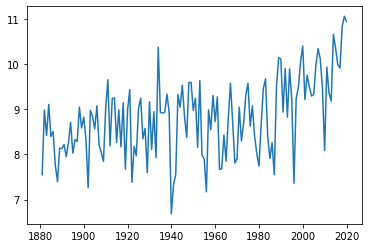

In [4]:
import matplotlib.pyplot as plt
plt.plot(jahr, temperaturBerlin)

### Niedrigste und höchste Durchschnittstemperatur Berlin
Eine einfache Auswertung ist die Untersuchung der minimalen und maximalen Werte eines Arrays.

In [5]:
minTemperatur = min(temperaturBerlin)
jahrMin = jahr[temperaturBerlin.index(min(temperaturBerlin))]
print ("niedrigste jährliche Durchschnittstemperatur in Berlin: " + str(minTemperatur) + " - aus Jahr " + str(jahrMin))
maxTemperatur = max(temperaturBerlin)
jahrMax = jahr[temperaturBerlin.index(max(temperaturBerlin))]
print ("höchste jährliche Durchschnittstemperatur in Berlin: " + str(maxTemperatur) + " - aus Jahr " + str(jahrMax))

niedrigste jährliche Durchschnittstemperatur in Berlin: 6.68 - aus Jahr 1940
höchste jährliche Durchschnittstemperatur in Berlin: 11.07 - aus Jahr 2019


### Darstellung von 5 Bundesländern
Als nächstes erstellen wir eine etwas aufwändigere Grafik, die alle Arrays enthält inklusive Beschriftungen. Es handelt sich um einen sogenannten Scatter plot (englisch Streudiagramm) in dem die verstreut dargestellt werden Datenpunkte.

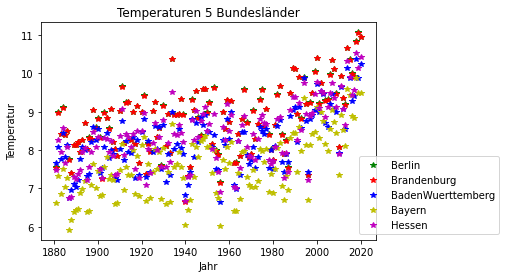

In [6]:
plt.title("Temperaturen 5 Bundesländer")
plt.xlabel("Jahr")
plt.ylabel("Temperatur")
plt.plot(jahr, temperaturBerlin, "r*", markersize=6, linewidth=1, color='g', label="Berlin")
plt.plot(jahr, temperaturBrandenburg, "r*", markersize=6, linewidth=1, color='r', label="Brandenburg")
plt.plot(jahr, temperaturBW, "r*", markersize=6, linewidth=1, color='b', label="BadenWuerttemberg")
plt.plot(jahr, temperaturBayern, "r*", markersize=6, linewidth=1, color='y', label="Bayern")
plt.plot(jahr, temperaturHessen, "r*", markersize=6, linewidth=1, color='m', label="Hessen")
plt.legend(loc=(.95, 0.025))
plt.show()

### Verteilung von Temperaturdaten
Zur Darstellung der Verteilung von Daten verwendet man gerne den Box plot (englisch Kastengrafik). 

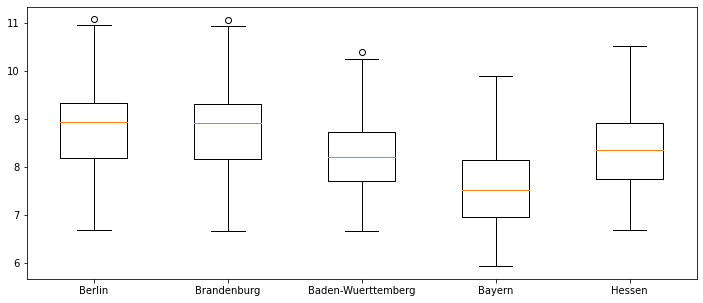

In [7]:
box_plot_data=[temperaturBerlin,temperaturBrandenburg,temperaturBW,temperaturBayern,temperaturHessen]
box_plot_names=["Berlin","Brandenburg","Baden-Wuerttemberg","Bayern","Hessen"]
fig = plt.figure(1, figsize=(12, 5))
ax = fig.add_subplot(111)
bp = ax.boxplot(box_plot_data)
ax.set_xticklabels(["Berlin","Brandenburg","Baden-Wuerttemberg","Bayern","Hessen"])
plt.show()